# Spoofing Signal Extraction ARP - 8.26.2024
### MITM ARP Spoofing Feature Analysis | Threat Profiling | Joseph Benyam

##### ARP Spoofing Method: relies on the transmission of manipulated ARP (Address Resolution Protocol) messages to associate the MAC address of the malicious device with the IP address of some other legitimate device in the network. This enables attackers to intercept, modify, or block network traffic 

In [36]:
import pandas as pd

# Load the datasets
benign_traffic1 = pd.read_csv('/home/jbenyam/threatdetection/dataset/csv/Benign_Final/BenignTraffic.pcap.csv')
benign_traffic2 = pd.read_csv('/home/jbenyam/threatdetection/dataset/csv/Benign_Final/BenignTraffic1.pcap.csv')
attack_traffic1 = pd.read_csv('/home/jbenyam/threatdetection/dataset/csv/MITM-ArpSpoofing/MITM-ArpSpoofing.pcap.csv')
attack_traffic2 = pd.read_csv('/home/jbenyam/threatdetection/dataset/csv/MITM-ArpSpoofing/MITM-ArpSpoofing1.pcap.csv')

# Display the first few rows of each dataset to understand their structure
benign_traffic_1.head(), benign_traffic_2.head(), mitm_arp_spoofing_1.head(), mitm_arp_spoofing_2.head()


(   Header_Length  Protocol Type  Time_To_Live         Rate  fin_flag_number  \
 0           32.0              6         198.4   430.273287              0.0   
 1           22.4              6         114.4   484.616113              0.0   
 2           27.2              6          62.5   398.610950              0.0   
 3           23.2              6          62.1   425.187438              0.0   
 4           32.0              6          64.0  1563.521956              0.0   
 
    syn_flag_number  rst_flag_number  psh_flag_number  ack_flag_number  \
 0              0.0              0.0              0.0              1.0   
 1              0.0              0.0              0.2              0.6   
 2              0.0              0.0              0.0              0.8   
 3              0.1              0.0              0.0              0.6   
 4              0.0              0.0              0.1              1.0   
 
    ece_flag_number  ...  LLC  Tot sum  Min   Max     AVG          Std  

#### MITM DNS Spoofing | Signals & Indicators of Compromise | Address Resolution Protocol
To identify the signals or Indicators of Compromise (IOCs) that indicate ARP spoofing compared to benign traffic, I'll perform the following steps:

**Statistical Analysis:** Compare the distributions of relevant features between the benign and ARP spoofing datasets.
**Feature Importance:** Determine which features are most indicative of ARP spoofing using feature importance techniques.

#### Let's first compute basic statistical summaries for both benign and attack traffic datasets

In [35]:
# Select a few key features to compare
key_features = ['Header_Length', 'Protocol Type', 'Time_To_Live', 'Rate', 'DNS', 'syn_flag_number', 'fin_flag_number', 'rst_flag_number', 'psh_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_flag_number', 'LLC', 'IAT', 'Tot sum', 'Tot size']

# Calculate the descriptive statistics for these features
benign_stats = benign_traffic[key_features].describe()
attack_stats = attack_traffic[key_features].describe()

benign_stats, attack_stats


(       Header_Length  Protocol Type   Time_To_Live          Rate  \
 count  657946.000000  657946.000000  657946.000000  6.579460e+05   
 mean       27.322766       6.923112     112.483725           inf   
 std         6.773500       3.087816      49.894843           NaN   
 min         0.000000       0.000000       0.000000  7.487495e+00   
 25%        23.600000       6.000000      73.500000  8.653759e+01   
 50%        29.200000       6.000000      97.400000  1.721083e+02   
 75%        32.000000       6.000000     141.700000  6.497760e+02   
 max        60.000000      17.000000     255.000000           inf   
 
                  DNS  syn_flag_number  fin_flag_number  rst_flag_number  \
 count  657946.000000    657946.000000    657946.000000    657946.000000   
 mean        0.035926         0.017560         0.014753         0.001936   
 std         0.085428         0.044774         0.042121         0.019940   
 min         0.000000         0.000000         0.000000         0.000000 

#### Statistical Differences in Feature Values | Benign vs. MITM ARP Spoofing 
Analysis to examine key statistical differences between the attack and benign traffic to identify relevant signals pertaining to MITM ARP Spoofing.

#### Result & Interpretation of Statistical Summaries | Highlighting IOCs specific to ARP spoofing
##### Key features where significant deviations are observed, such as:
1. **Header_Length**: Differences might indicate variations in packet structure during the attack.
2. **Time_To_Live (TTL)**: ARP spoofing might show abnormal TTL values as packets are rerouted.
3. **Flag numbers** (fin_flag_number, syn_flag_number, etc.): There might indicate irregular traffic patterns or anomalies caused be the attack.
4. **Rate**, **LLC**, **Tot size**, **IAT (Inter-Arrival Time)**: Differences here might indicate irregular traffic patterns or anomalies caused by the attack.

#### Correlation Analysis & Distribution Comparision
To understand the relationship between the features and how these features distinguish attack traffic from benign traffic, we can compute the correlation matrix and visualize the distribution of the features for benign and attack traffic.


In [8]:
#### Correlation Analysis & Distribution Comparision

# Compute correlations and distribution differences between attack and benign traffic for key features

# Correlation matrices for benign and attack traffic
benign_corr = benign_traffic.corr()
attack_corr = attack_traffic.corr()

# Benign 
print("Benign Traffic | Correlation Matrix")
print(benign_corr)


# Attack Traffic Correlation Matrix:
print("Attack Traffic | Correlation Matrix")
print(attack_corr)

# Difference in correlation matrices
corr_diff = attack_corr - benign_corr

print("Correlation difference Matrix")
print(corr_diff)

# Distribution comparison for key features
# dist_diff(key_features, benign_traffic, attack_traffic)


Benign Traffic | Correlation Matrix
                 Header_Length  Protocol Type  Time_To_Live      Rate  \
Header_Length         1.000000      -0.590805      0.204017  0.119668   
Protocol Type        -0.590805       1.000000     -0.157427 -0.031968   
Time_To_Live          0.204017      -0.157427      1.000000  0.006237   
Rate                  0.119668      -0.031968      0.006237  1.000000   
fin_flag_number      -0.072704      -0.040968     -0.135877 -0.033992   
syn_flag_number      -0.114171       0.020985     -0.146930 -0.040791   
rst_flag_number      -0.025883      -0.018782     -0.029837 -0.007894   
psh_flag_number      -0.044704      -0.118504     -0.170729 -0.082061   
ack_flag_number       0.890814      -0.682677      0.275584  0.091158   
ece_flag_number       0.001471      -0.006722     -0.024218 -0.006143   
cwr_flag_number      -0.003235      -0.002197     -0.017312 -0.004972   
ack_count             0.889634      -0.681944      0.276033  0.090007   
syn_count      

#### Results of Correlation Analysis
### Key Insights from the Correlation Matrices:

1. **Correlation Strength Changes:**    
    - **Header_Length & Protocol Type:** The correlation between `Header_Length` and `Protocol Type` changes significantly from -0.59 in benign traffic to -0.76 in attack traffic. This stronger negative correlation in attack traffic suggests that the manipulation of packets, likely in terms of altered packet headers, is more coordinated with the protocol type during an ARP spoofing attack.
    - **Rate & Header_Length:** The correlation between `Rate` and `Header_Length` increases from 0.12 to 0.41 in attack traffic, indicating that packet manipulation in ARP spoofing may lead to more consistent packet sizes or frequencies, affecting the header length.
    - **ACK Flag Number:** The correlation of `ack_flag_number` with other flags (e.g., `psh_flag_number`) shows substantial differences. In attack traffic, the correlations are stronger, indicating that the attack likely involves **consistent ACK flag manipulation** as part of intercepting and modifying communications.
    - **HTTPS Correlations:** HTTPS shows a much stronger correlation with several features in attack traffic (e.g., 0.87 with `ack_flag_number`) compared to benign traffic (0.40). This could be due to attackers targeting encrypted traffic to capture sensitive data.
2. **ARP & Related Protocols:**
    - **ARP & LLC:** Both ARP and LLC (Link Layer Control) show a significant change in correlation with other features like `Time_To_Live` and `Rate`. The ARP protocol, heavily used in spoofing, displays different interaction patterns in attack traffic, which is consistent with the manipulation of network devices.
    - **ICMP & ARP:** The correlation between ICMP and ARP changes direction in attack traffic, suggesting that ICMP traffic might be used differently during the attack, possibly to send error messages related to incorrect ARP entries.
3. **Protocol-Specific Behavior:**
    - **TCP and UDP Differences:** The correlation between TCP and UDP flags and other features shifts notably. In benign traffic, UDP has a strong negative correlation with several features, which is reduced or reversed in attack traffic. This suggests that ARP spoofing may affect UDP traffic patterns differently from TCP, possibly due to the connectionless nature of UDP.
    - **DNS and HTTPS:** DNS shows a decreased correlation with other features during an attack, while HTTPS shows an increased correlation, highlighting the attackers' focus on high-value traffic (e.g., secure communications).
4. **Temporal and Packet Size Features:**
    - **Inter-Arrival Time (IAT):** The changes in correlation involving `IAT` (e.g., with `psh_flag_number`) are significant. The attack traffic shows altered timing characteristics, which is expected in an MITM attack where traffic is intercepted and possibly delayed.
    - **Total Size and Variance:** The correlation changes involving `Tot size` and `Variance` suggest that packet size distribution and its variability are affected during an attack, potentially indicating the insertion or modification of packets by the attacker.


### Visualization of Correlation Matrices | ARP Spoofing vs. Benign Traffic
Examine anomalies by visualizing the packet traffic data from the benign network traffic csv and the ARP spoofing csv to understand differences between feature values between benign and malicious traffic. Goal is to determine anomalies between benign network traffic and ARP spoofing traffic, and which features objectively capture the anomalies.

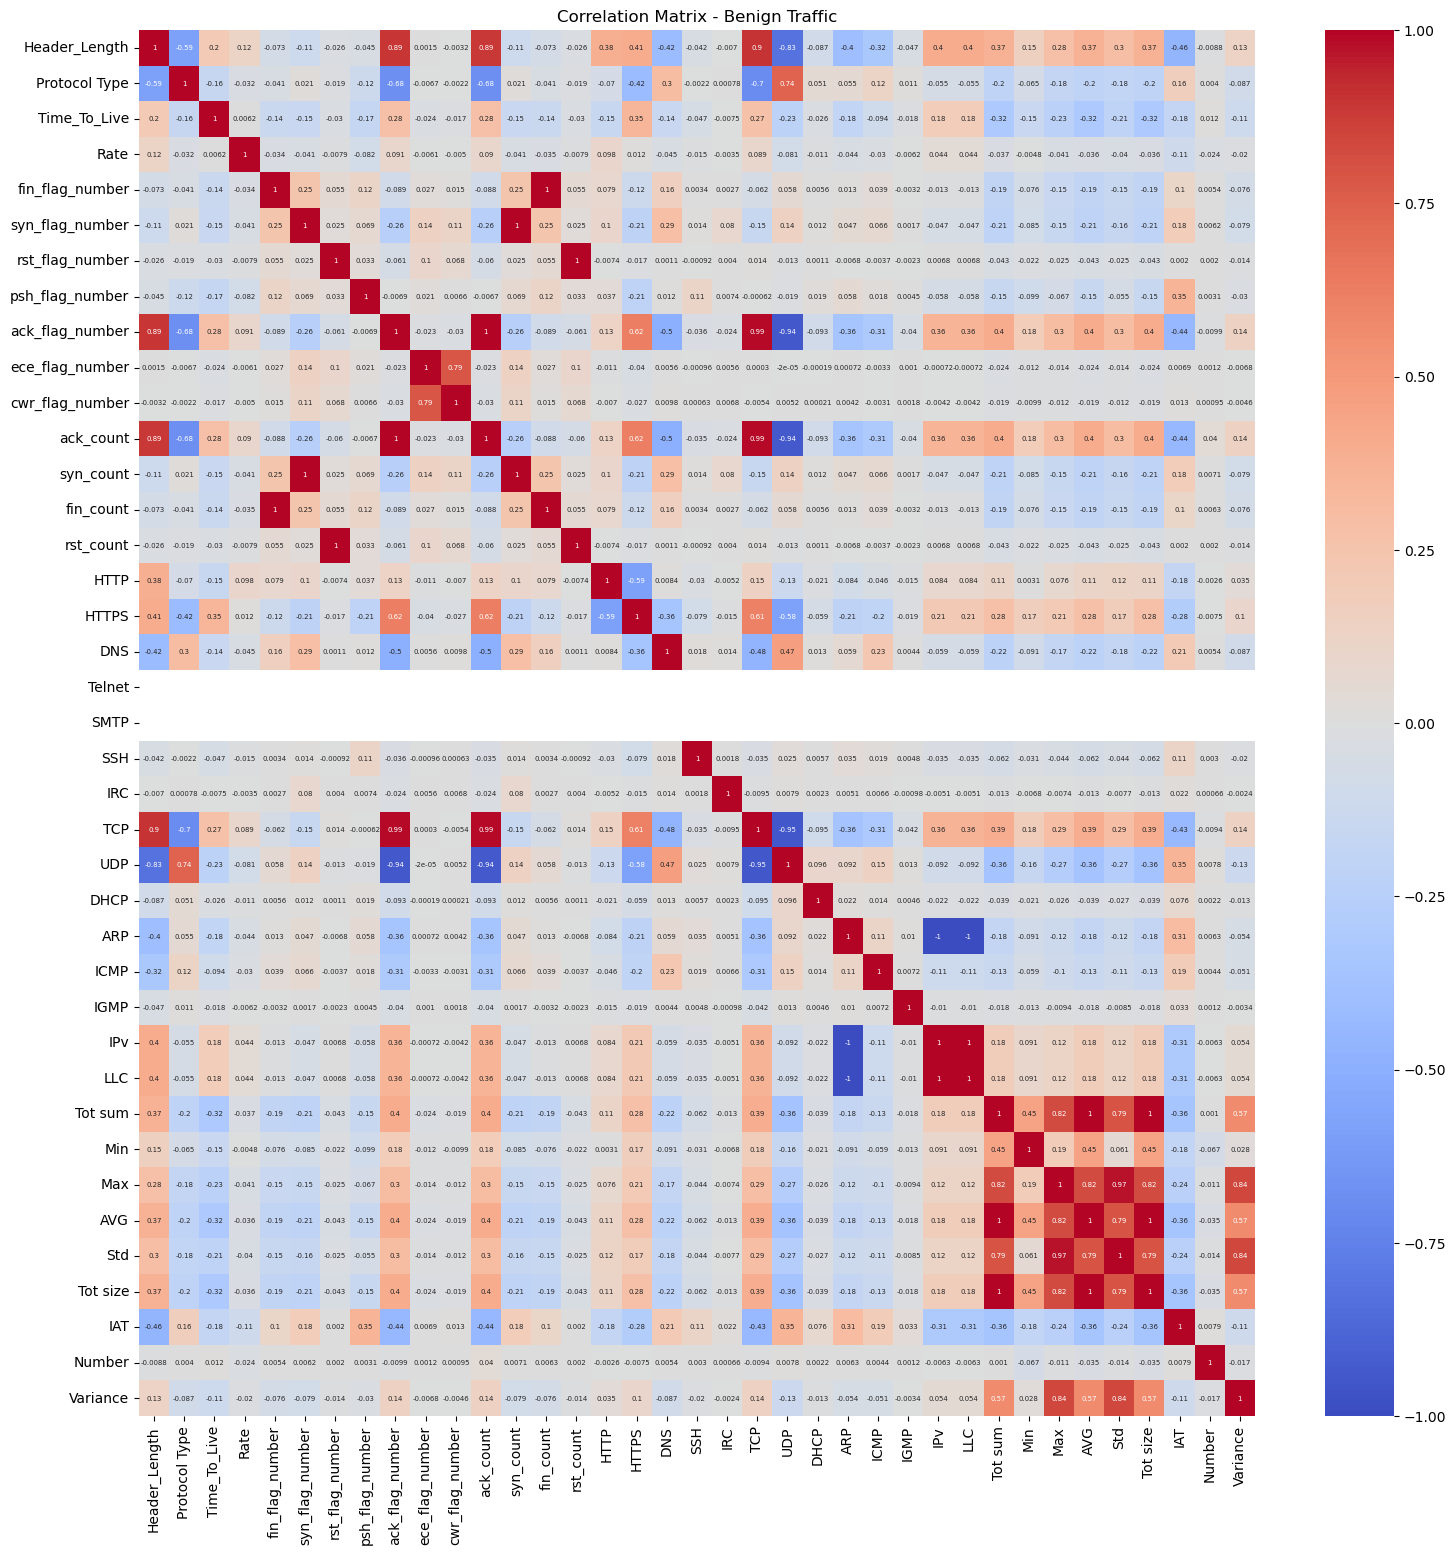

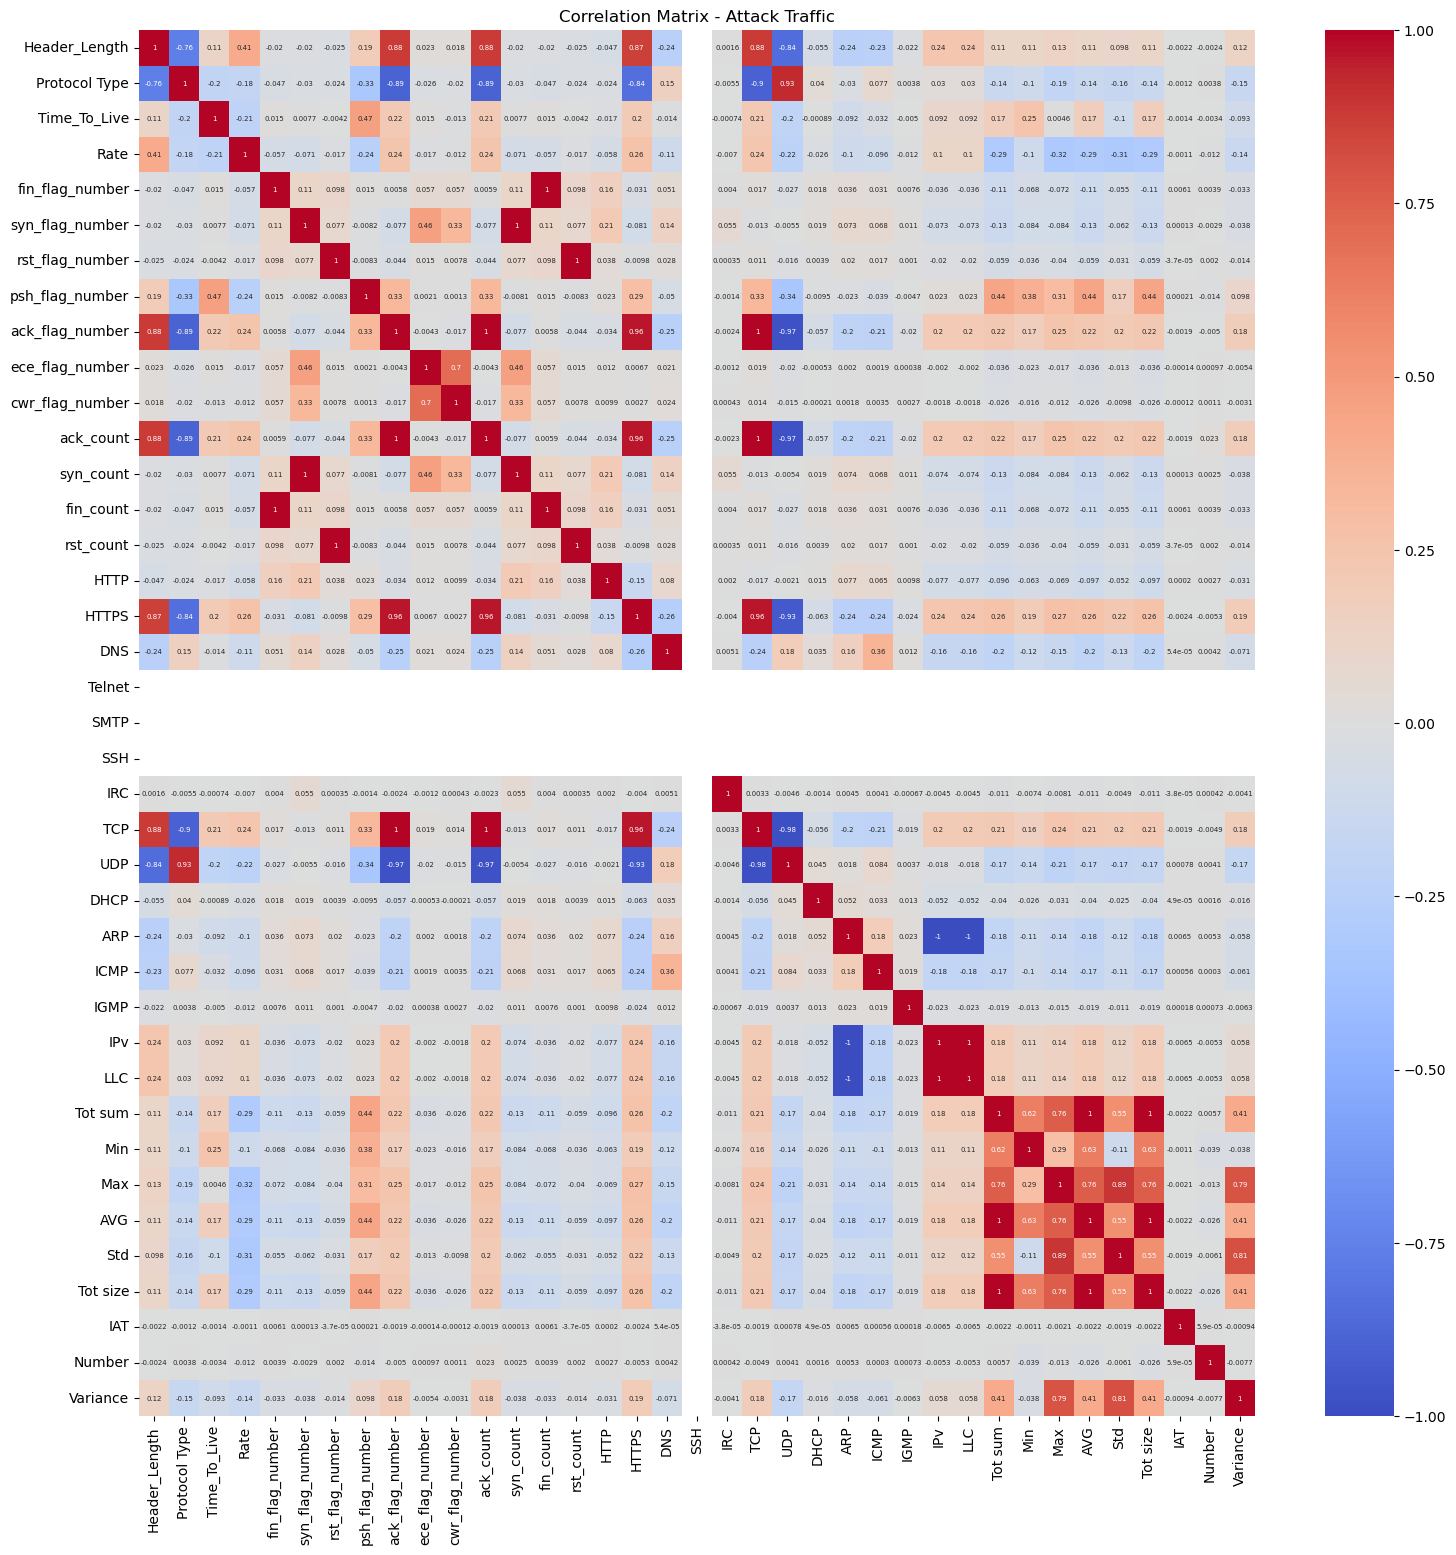

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix for benign traffic
plt.figure(figsize=(18, 18))
sns.heatmap(benign_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Benign Traffic')
plt.show()

# Plot correlation matrix for attack traffic
plt.figure(figsize=(18, 18))
sns.heatmap(attack_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Attack Traffic')
plt.show()


#### Apply Feature Importance w.Random Forest Classifier
Method to determine the features more significant in signaling ARP spoofing, based on the benign traffic and attack traffic data.

In [30]:
import numpy as np
## Data Cleaning & Preprocessing
## Replace Large Infinite Values with NaN & Remove Rows with NaN Values
# Replace large infinite values with NaN
combined_data = pd.concat([benign_traffic, attack_traffic])
combined_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remove rows with NaN values
combined_data.dropna(inplace=True)
print(f"Number of rows after removing NaN values: {combined_data.shape[0]}")


Number of rows after removing NaN values: 965449


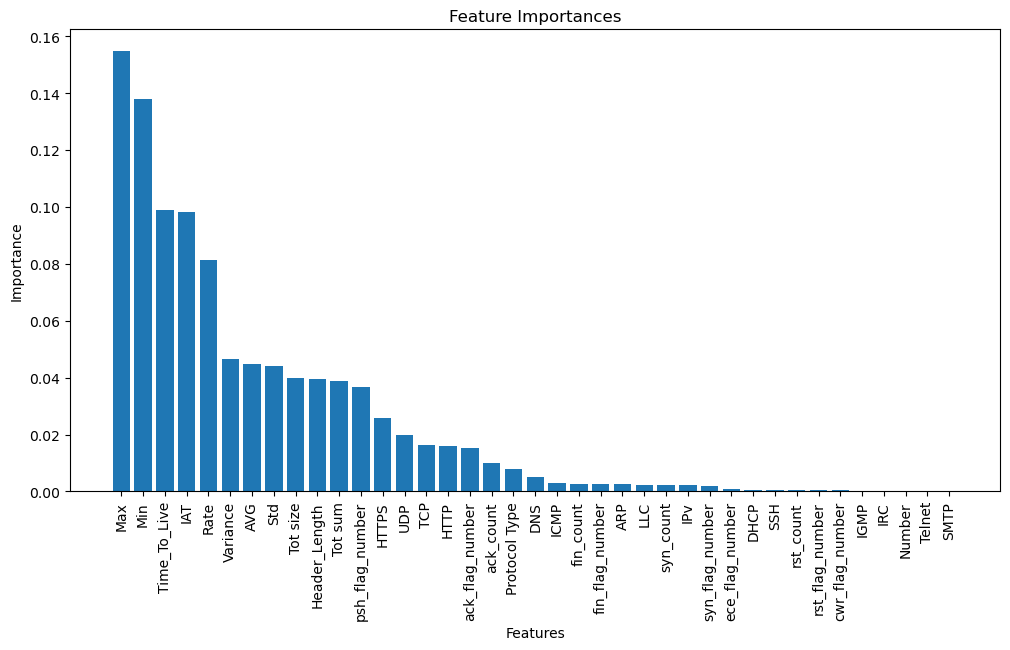

In [32]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Combine the benign and attack traffic datasets
combined_data = pd.concat([benign_traffic, attack_traffic])

# Replace infinite values with NaN
combined_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the mean of the column
combined_data.fillna(combined_data.mean(), inplace=True)

# Create the target variable indicating whether the traffic is benign or attack
target = pd.Series([0] * len(benign_traffic) + [1] * len(attack_traffic))

# Ensure the lengths of combined_data and target are the same
assert len(combined_data) == len(target), "Inconsistent number of samples in combined_data and target"

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Fit the classifier on the combined data
rf.fit(combined_data, target)

# Get the feature importances
importances = rf.feature_importances_

# Sort the features by importance in descending order
sorted_indices = np.argsort(importances)[::-1]

# Get the feature names
feature_names = combined_data.columns

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


In [34]:
## Analysis Results


#### Comparing Results of Correlation Matrix Analysis and Feature Importance Model from Random Forest Ensemble.

##### 1. Correlation Strength Changes:
   
- Header_Length & Protocol Type: The change in correlation suggests a significant role of Header_Length and Protocol Type in detecting ARP spoofing, which is consistent with your feature importance output where features related to packet characteristics (Header_Length, Protocol Type) were found to be significant. This reflects the impact of packet manipulation during the attack.

- Rate & Header_Length: The increased correlation between Rate and Header_Length in attack traffic aligns with Rate being a highly important feature in the Random Forest analysis. This further supports the idea that ARP spoofing affects packet sizes and transmission frequencies.

- ACK Flag Number: The strong correlation with other flags during the attack aligns with the importance of flag-related features (ack_flag_number, psh_flag_number) in your feature importance analysis. These features capture the manipulation of flags that occurs in ARP spoofing attacks.

- HTTPS Correlations: The increased correlation of HTTPS-related features during an attack aligns with the feature importance results showing HTTPS and other related features as crucial. This indicates the attack's focus on intercepting encrypted traffic.

##### 2. ARP & Related Protocols:

- ARP & LLC: The change in correlation between ARP and LLC with other features like Time_To_Live and Rate is in line with the importance of these features in your analysis. This suggests that the interaction between ARP and these protocols is a key indicator of ARP spoofing.
  
- ICMP & ARP: The shift in correlation between ICMP and ARP in attack traffic corresponds with the mid-range importance of these protocol features in the Random Forest model. This indicates that changes in the use of ICMP during ARP spoofing are detectable and relevant.

##### 3. Protocol-Specific Behavior:

- TCP and UDP Differences: The notable shift in correlations involving TCP and UDP flags during the attack matches the importance of these protocol features in your model. This suggests that ARP spoofing affects the behavior of these protocols differently, which is reflected in their importance scores.
  
- DNS and HTTPS: The decreased correlation of DNS and increased correlation of HTTPS during attacks aligns with the importance of these protocol-specific features in your analysis. Attackers might prioritize manipulating secure communications (HTTPS) while affecting DNS differently.

##### 4. Temporal and Packet Size Features:

- Inter-Arrival Time (IAT): The significant changes in correlations involving IAT during attacks, particularly its connection with flags like psh_flag_number, are consistent with its high importance in the Random Forest output. This indicates that temporal patterns are disrupted during ARP spoofing, which is an important signal.

- Total Size and Variance: The correlation changes in Tot size and Variance during the attack align with their importance in your model. These features likely capture the variability and manipulation in packet sizes introduced by the attacker.